In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df0 = pd.read_csv("customer_shopping_data.csv")

In [126]:
df0.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [127]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


## Cambio de formato de fecha

In [128]:
df1 = df0.copy()
# Convertimos la informacion de fecha que esta en formato %d/%m/%Y
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d/%m/%Y')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [129]:
df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [130]:
#Agregar columna para años
df1['year'] = df1['invoice_date'].dt.year

df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021


In [131]:
#Agregar columna para años
df1['month'] = df1['invoice_date'].dt.month

df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


## Analisis de tasa de compras por genero

In [132]:
df0['customer_id'].nunique()

99457

In [133]:
dfm = df0[df0['gender'] == "Male"]
print('La cantidad de transacciones hechas por hombres es', dfm.shape[0], 'transacciones')

La cantidad de transacciones hechas por hombres es 39975 transacciones


In [134]:
dff = df0[df0['gender'] == "Female"]
print('La cantidad de transacciones hechas por mujeres es', dff.shape[0], 'transacciones')

La cantidad de transacciones hechas por mujeres es 59482 transacciones


In [135]:
porc_m = dfm.shape[0]/df0.shape[0]*100
porc_f = dff.shape[0]/df0.shape[0]*100

print('Porcentaje transacciones de mujeres: ', round(porc_f, 2), '%')
print('Porcentaje transacciones de hombres: ', round(porc_m, 2), '%')

Porcentaje transacciones de mujeres:  59.81 %
Porcentaje transacciones de hombres:  40.19 %


Text(0.5, 1.0, 'Porcentaje de transacciones')

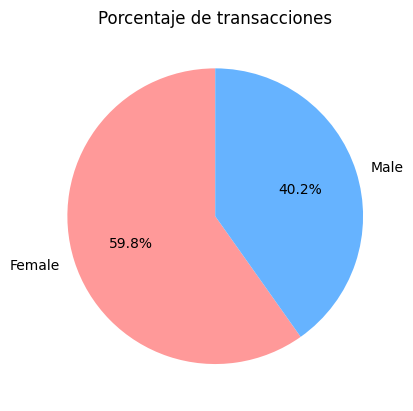

In [136]:
df1 = df0.copy()
category_counts = df1['gender'].value_counts() 

# Define colors for each category slice
colors = ['#ff9999','#66b3ff'] 

# Create the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Add title and show the chart
plt.title('Porcentaje de transacciones')


[Text(0.5, 1.0, 'Gender Count')]

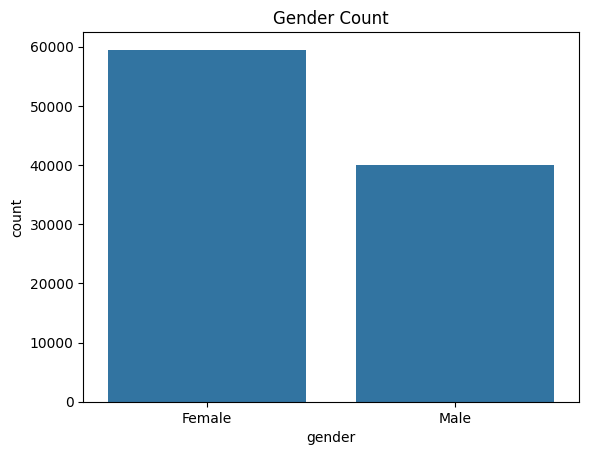

In [137]:
sns.countplot(data=df1, x='gender').set(title='Gender Count')

## Agrupacion por edades

In [138]:
df2 = df1.copy()

In [139]:
df2['GrupoEdades'] =df2['age']
df2.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,GrupoEdades
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,28
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,21
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,20
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,66
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,53


In [140]:
def GrupoEdades(age):
    if age < 26:
        return "18-25"
    elif (age >= 26) and (age < 36):
        return "26-35"
    elif (age >= 36) and (age < 46):
        return "36-45"
    elif (age >= 46) and (age < 56):
        return "46-55"
    elif (age >= 56) and (age < 66):
        return "56-65"
    else:
        return "+65"

In [141]:
df2['GrupoEdades'] = df2['GrupoEdades'].apply(GrupoEdades)
df2.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,GrupoEdades
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,26-35
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,18-25
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,18-25
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,+65
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,46-55


Text(0.5, 1.0, 'Porcentaje de transacciones por grupo de edad')

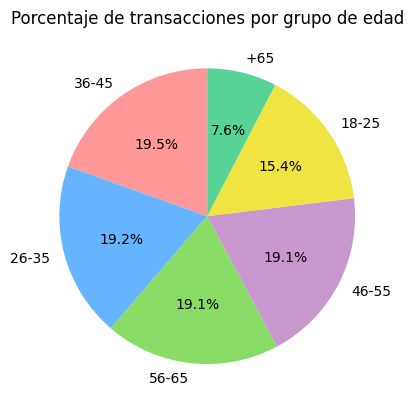

In [142]:
Trans_edad = df2['GrupoEdades'].value_counts() 

# Define colors for each category slice
colors = ['#ff9999','#66b3ff', '#88DC65', '#C997CD', '#F0E442', '#58D397']

# Create the pie chart
plt.pie(Trans_edad, labels=Trans_edad.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Add title and show the chart
plt.title('Porcentaje de transacciones por grupo de edad')

### Total gastado por grupo de edad

In [143]:
df2['TotalPrice'] = df2['quantity'] * df2['price']
df2.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,GrupoEdades,TotalPrice
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,26-35,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,18-25,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,18-25,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,+65,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,46-55,242.40
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul,26-35,7502.00
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park,46-55,40.66
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul,26-35,1200.32
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity,+65,2700.72
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon,56-65,1200.32


In [144]:
df2.groupby('GrupoEdades')['TotalPrice'].sum()

GrupoEdades
+65      19210874.12
18-25    38118271.35
26-35    47879659.58
36-45    50184235.79
46-55    48219742.64
56-65    47893010.77
Name: TotalPrice, dtype: float64

### Porcentaje de transacciones segun genero y edad

In [145]:
df_age_m = df2[df2['gender'] == "Male"]
df_age_f = df2[df2['gender'] == "Female"]

Text(0.5, 1.0, 'Porcentaje de transacciones por grupo de edad (Hombres)')

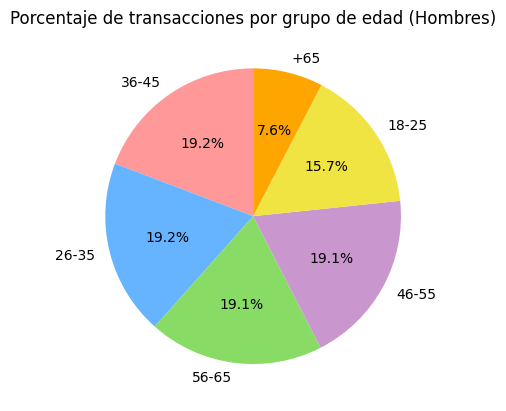

In [146]:
Trans_edad_m = df_age_m['GrupoEdades'].value_counts() 

# Define colors for each category slice
colors = ['#ff9999','#66b3ff', '#88DC65', '#C997CD', '#F0E442', '#FFA500']

# Create the pie chart
plt.pie(Trans_edad_m, labels=Trans_edad.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Add title and show the chart
plt.title('Porcentaje de transacciones por grupo de edad (Hombres)')

Text(0.5, 1.0, 'Porcentaje de transacciones por grupo de edad (Mujeres)')

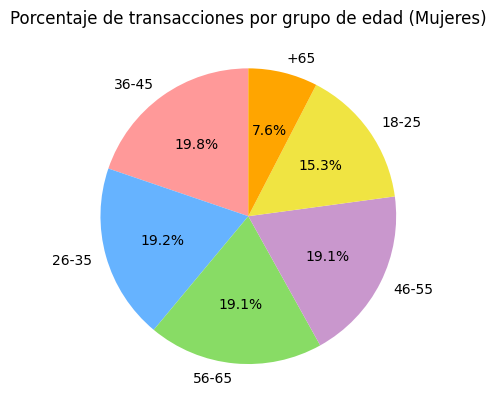

In [147]:
Trans_edad_f = df_age_f['GrupoEdades'].value_counts() 

# Define colors for each category slice
colors = ['#ff9999','#66b3ff', '#88DC65', '#C997CD', '#F0E442', '#FFA500']

# Create the pie chart
plt.pie(Trans_edad_f, labels=Trans_edad_f.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Add title and show the chart
plt.title('Porcentaje de transacciones por grupo de edad (Mujeres)')

### Histograma

[Text(0.5, 1.0, 'Histograma de Edades')]

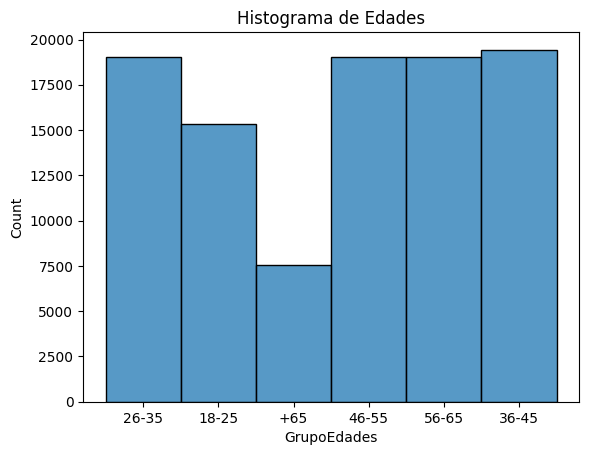

In [148]:
sns.histplot(data=df2, x='GrupoEdades').set(title='Histograma de Edades')

Agrupacion por edades y genero

In [149]:
grouped_df = df2.groupby(['GrupoEdades', 'gender'])['TotalPrice'].sum().reset_index()
grouped_df


,GrupoEdades,gender,TotalPrice
0,+65,Female,11062144.84
1,+65,Male,8148729.28
2,18-25,Female,23159143.70
3,18-25,Male,14959127.65
4,26-35,Female,28292995.13
5,26-35,Male,19586664.45
6,36-45,Female,30060801.14
7,36-45,Male,20123434.65
8,46-55,Female,28566256.46
9,46-55,Male,19653486.18


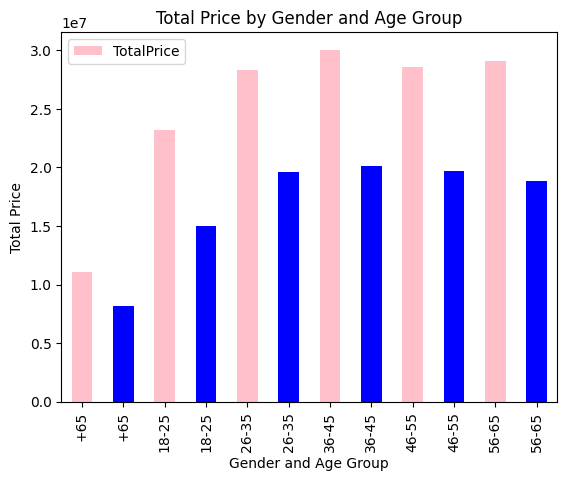

In [150]:
colors = {'Male': 'blue', 'Female': 'pink'}
grouped_df.plot(x='GrupoEdades', y='TotalPrice', kind='bar', color =[colors[g] for g in grouped_df['gender']])
plt.title('Total Price by Gender and Age Group')
plt.xlabel('Gender and Age Group')
plt.ylabel('Total Price')
plt.xticks(rotation=90)
plt.show()

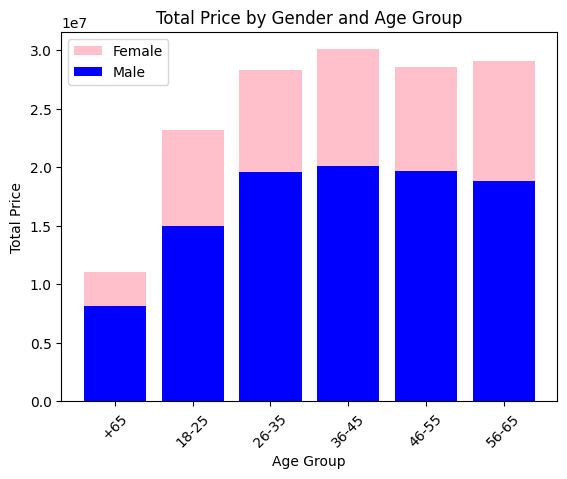

In [151]:
#Otra forma
colors = {'Male': 'blue', 'Female': 'pink'}

# Create the bar plot
fig, ax = plt.subplots()
for gender, group in grouped_df.groupby('gender'):
    ax.bar(group['GrupoEdades'], group['TotalPrice'], label=gender, color=colors[gender], width = 0.8)

plt.title('Total Price by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Price')
plt.xticks(rotation=45)

# Add legend
plt.legend()

plt.show()

# Division de metodos de pago

In [152]:
df_methods = df2['payment_method'].value_counts().reset_index()
df_methods

,payment_method,count
0,Cash,44447
1,Credit Card,34931
2,Debit Card,20079


In [153]:
df_methodsPrice = df2.groupby('payment_method')['TotalPrice'].sum()
df_methodsPrice

payment_method
Cash           1.128322e+08
Credit Card    8.807712e+07
Debit Card     5.059643e+07
Name: TotalPrice, dtype: float64

Text(0.5, 1.0, 'Total gastado por metodo de pago')

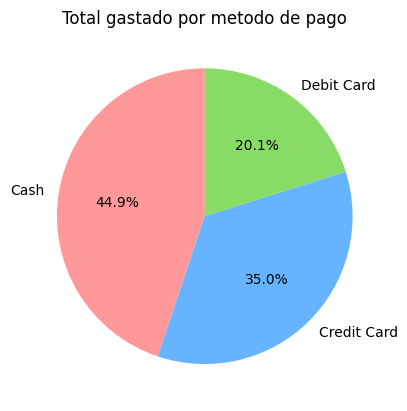

In [154]:
# Define colors for each category slice
colors = ['#ff9999','#66b3ff', '#88DC65']

# Create the pie chart
plt.pie(df_methodsPrice, labels=df_methodsPrice.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Add title and show the chart
plt.title('Total gastado por metodo de pago')

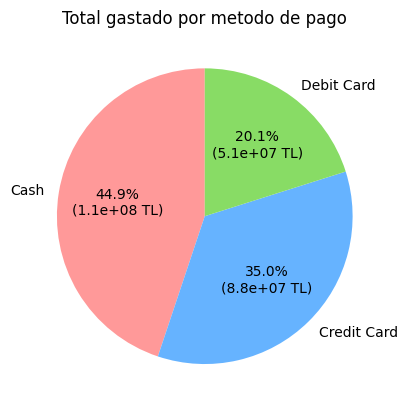

In [166]:
colors = ['#ff9999','#66b3ff', '#88DC65']

def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        exp_val = f"{val:.1e} TL"  # Format value in scientific notation with 2 decimals
        return f'{pct:.1f}%\n({exp_val})'
    return my_autopct


# Create the pie chart
plt.pie(df_methodsPrice, labels=df_methodsPrice.index, autopct=autopct_format(df_methodsPrice), startangle=90, colors=colors)

# Add title and show the chart
plt.title('Total gastado por metodo de pago')
plt.show()